In [1]:
import random
import numpy as np
from skimage import data
from skimage.transform import resize
import torch

im = data.camera()
im = resize(im, (im.shape[0] // 2, im.shape[1] // 2), mode='reflect', preserve_range=True, anti_aliasing=True).astype(np.uint8)
im = torch.from_numpy(im)

In [2]:
import matplotlib.pyplot as plt

In [3]:
im.shape

torch.Size([256, 256])

In [4]:
histogram = torch.histc(im.float(), bins=256)
histogram.shape

torch.Size([256])

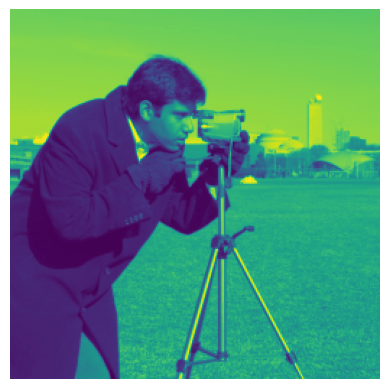

In [6]:
plt.imshow(im)
plt.axis('off')
plt.show()

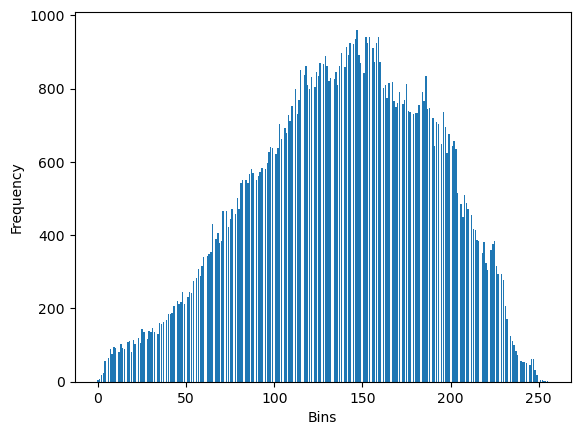

In [19]:
plt.bar(range(256), histogram, align='center')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

In [20]:
p = torch.zeros(histogram.shape)
for i in range(256):
    p[i] = torch.sum(histogram[i])/torch.sum(histogram)

In [21]:
sigma_squared = torch.zeros(histogram.shape)

In [22]:
for t in range(256):
    omega_1 = torch.sum(p[:t+1])
    mu_1 = torch.sum(torch.tensor([i * p[i] for i in range(t+1)]))/omega_1
    omega_2 = 1 - omega_1
    mu_2 = (torch.sum(torch.tensor([i * p[i] for i in range(t+1, 256)])))/omega_2
    sigma_squared[t] = omega_1 * omega_2 * torch.square(mu_1 - mu_2)

In [23]:
sigma_squared[torch.isnan(sigma_squared)] = 0

In [24]:
otsu_threshold = torch.argmax(sigma_squared)
print("Otsu Threshold:", otsu_threshold.item())

Otsu Threshold: 132


In [25]:
out = torch.zeros(im.shape)
out[(im.float()>otsu_threshold)] = 255
out.shape

torch.Size([150, 225, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


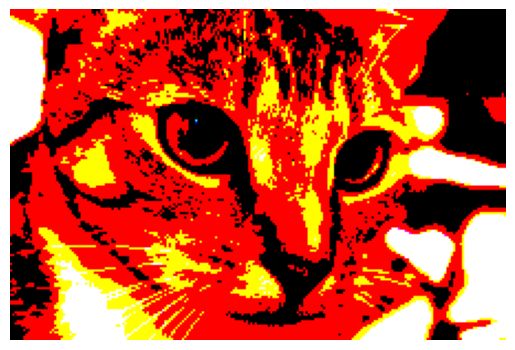

In [26]:
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()